### AFINN Sentiment Analysis of Yelp review test - 321K records where users wrote 50 -100 reviews
* AFINN Github repo - https://github.com/fnielsen/afinn/tree/master/afinn/data
* AFINN 165 has 3382 entries 
* for browser based AFINN SA go to http://darenr.github.io/afinn/ 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import sys

In [30]:
Yelp_subsample= pd.read_csv('Resources/reviews_users_50-100.csv')

In [31]:
#New dataframe stats
Yelp_subsample.head()
Yelp_subsample.count() # 323,310 text records total
# Yelp_subsample['user_id'].nunique() # 4,676
# Yelp_subsample['business_id'].nunique() #50,642
# Yelp_100Krandom=Yelp_subsample.sample(n=100000)

name            323310
review_id       323310
user_id         323310
business_id     323310
stars           323310
text            323310
date            323310
review_count    323310
word_count      323310
dtype: int64

In [32]:
def get_afinn_scores(file="AFINN/AFINN-en-165.txt" or "AFINN/AFINN-emoticon-8.txt"): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return(scores)

In [33]:
import nltk
afinn_scores = get_afinn_scores()
yelp_text = Yelp_subsample['text'] 

total =[]
score =[]
for review in yelp_text:
    review = str(review)
  
    #Tokenize the review
    words = nltk.word_tokenize(review)
    
    #Get the total AFFIN score
    total_score = 0
    counter = 0
    for w in words:
        if w.lower() in afinn_scores:
          total_score += afinn_scores[w.lower()]
          counter += 1
    total.append(total_score)
    try:
        normalized_sentiment = (total_score/math.sqrt(counter)) # based on # sentiment = float(sum(sentiments))/math.sqrt(len(sentiments))
    except ZeroDivisionError:
        normalized_sentiment = 0
    score.append(normalized_sentiment)

# Add new columns to dataframe
Yelp_subsample['SAsum_score'] = total
Yelp_subsample['SAnorm_score'] = score

In [35]:
#Yelp_subsample.drop(['sum_score','norm_score'], axis=1, inplace=True)

In [36]:
Yelp_subsample.describe()

,stars,review_count,word_count,SAsum_score,SAnorm_score
count,323310.000000,323310.000000,323310.000000,323310.000000,323310.000000
mean,3.712227,71.869240,138.944632,13.634586,4.262965
std,1.131043,14.220856,112.224736,12.624809,2.911558
min,1.000000,51.000000,1.000000,-111.000000,-17.335288
25%,3.000000,59.000000,61.000000,6.000000,2.645751
50%,4.000000,70.000000,109.000000,12.000000,4.500000
75%,5.000000,83.000000,182.000000,19.000000,6.123724
max,5.000000,100.000000,1124.000000,178.000000,19.398148


Text(0,0.5,'Counts')

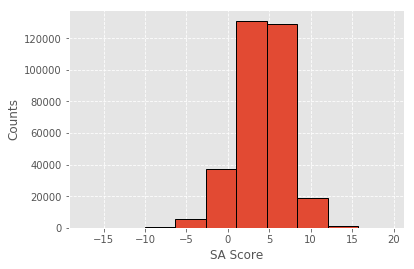

In [37]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_subsample['SAnorm_score'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.xlabel('SA Score')
plt.ylabel('Counts')

In [38]:
#Subdivide norm_scores into 5 bins
print(Yelp_subsample['SAnorm_score'].quantile([0.2, 0.4, 0.6, 0.8, 1]))

0.2     2.000000
0.4     3.794733
0.6     5.125693
0.8     6.609222
1.0    19.398148
Name: SAnorm_score, dtype: float64


In [39]:
#Split data into 5 bins based on normalized score
bins = [-17.40, 2.00, 3.80, 5.13, 6.61, 19.40]
bin_stars = [1,2,3,4,5]
pd.cut(Yelp_subsample['SAnorm_score'], bins, labels = bin_stars)
Yelp_subsample['cat_stars'] = pd.cut(Yelp_subsample['SAnorm_score'], bins, labels=bin_stars)
Yelp_new_rating=Yelp_subsample
Yelp_new_rating.tail()

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,SAsum_score,SAnorm_score,cat_stars
323305,"""Ferraro's Italian Restaurant & Wine Bar""",T2dStTUnJFOQuYhJNvyEWg,a9UymHuKxZKMnHXOo3nLKA,DESv2ys6SjBKA4SyDtJvxw,5,"Didn't even know this place existed, or its la...",2016-07-16,64,179,31,8.004166,5
323306,"""Noodles""",Te76lXMFbdMwdjZ_QUYTDQ,a9UymHuKxZKMnHXOo3nLKA,CCRgGKhzxSpl38w7yhqKUw,5,I don't how this place has so few stars. Maybe...,2016-06-18,64,122,4,1.414214,1
323307,"""Sushi House Goyemon""",Lmu5cgFFAcDFxIA0w8WObA,a9UymHuKxZKMnHXOo3nLKA,JyxHvtj-syke7m9rbza7mA,5,This place is usually always packed and we luc...,2016-05-26,64,180,19,4.050814,3
323308,"""Yellowtail""",cPp2sAxSF-4vfQqex5If5g,a9UymHuKxZKMnHXOo3nLKA,Dxaz8OxaadecnWol18kAtw,4,I've always loved yellowtail... Just not yello...,2015-12-17,64,256,27,6.971370,5
323309,"""Sushi Neko""",6OBNWpnPR87iBdca4ZtODA,a9UymHuKxZKMnHXOo3nLKA,ghVhlFpNhfBwWDFGSlt2JA,5,This has quickly became a favorite spot for me...,2017-07-26,64,71,7,3.130495,2


In [47]:
#Review Sample 1
Yelp_new_rating[Yelp_new_rating['review_id'] == 'NHuuLXPWt9d9JXmptz3zjg']

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,SAsum_score,SAnorm_score,cat_stars
3542,"""Windsor Arms Hotel Tea Room""",NHuuLXPWt9d9JXmptz3zjg,GXVEhnIM1CpiGj9TZehxGw,GjQBLRtmq8cJjekipzJ49g,1,I went here through a friends groupon coupon a...,2013-07-03,84,489,50,8.703883,5


In [48]:
#Review sample 2
Yelp_new_rating[Yelp_new_rating['review_id'] == 'jot5d7YV142F6CkRj4NwuQ'] 

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,SAsum_score,SAnorm_score,cat_stars
274040,"""Phil's Filling Station Grill""",jot5d7YV142F6CkRj4NwuQ,A-5DQIIb1YfQEBmabv-6Fw,-FrgepJj0h-OWU1CupUrOQ,2,"Luv the atmosphere, great setting for breakfas...",2014-12-13,62,64,13,5.307228,4


In [49]:
#Review sample 3
Yelp_new_rating[Yelp_new_rating['review_id'] == '337t1tUUyg6ydOfjACwBNg']

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,SAsum_score,SAnorm_score,cat_stars
105,"""Chowder House Cafe""",337t1tUUyg6ydOfjACwBNg,8XN-mq5ZLx1oXYI0IJcW0Q,2JsLzYF8rUalwpm5LDEcog,3,"Dingy atmosphere, and the food was mediocre. T...",2014-08-09,54,25,5,3.535534,2


In [36]:
Yelp_new_rating.dtypes

name              object
review_id         object
user_id           object
business_id       object
stars              int64
text              object
date              object
review_count       int64
word_count         int64
cat_stars       category
value_stars         int8
SAsum_score        int64
SAnorm_score     float64
dtype: object

In [187]:
#Converting categories in bin_stars into integers in set_stars so that new bins can be plotted
#Delete extra columns
#Not sure why conversion to integers started at 0 so I added +1
Yelp_new_rating['value_stars']= pd.Categorical(Yelp_new_rating.cat_stars).codes + 1
Yelp_new_rating.head()

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,cat_stars,value_stars,SAsum_score,SAnorm_score
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,127,5,5,22,7.778175
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,128,1,1,5,1.581139
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,190,4,4,23,6.147009
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,98,1,1,1,0.447214
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,106,3,3,18,4.992302


In [202]:
#print(Yelp_new_rating.query('stars ==5').text)

In [38]:
Yelp_new_rating.describe()

,stars,review_count,word_count,value_stars,SAsum_score,SAnorm_score
count,323310.000000,323310.000000,323310.000000,323310.000000,323310.000000,323310.000000
mean,3.712227,71.869240,138.944632,2.994606,13.634586,4.262965
std,1.131043,14.220856,112.224736,1.416603,12.624809,2.911558
min,1.000000,51.000000,1.000000,1.000000,-111.000000,-17.335288
25%,3.000000,59.000000,61.000000,2.000000,6.000000,2.645751
50%,4.000000,70.000000,109.000000,3.000000,12.000000,4.500000
75%,5.000000,83.000000,182.000000,4.000000,19.000000,6.123724
max,5.000000,100.000000,1124.000000,5.000000,178.000000,19.398148


(0, 6)

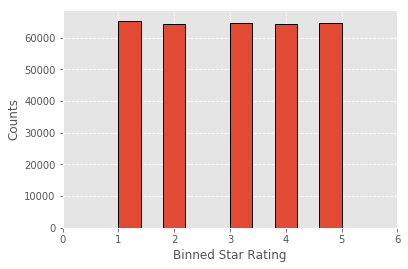

In [123]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_new_rating['value_stars'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.xlabel('Binned Star Rating')
plt.ylabel('Counts')
plt.xlim(0,6)

Text(0,0.5,'SA Score')

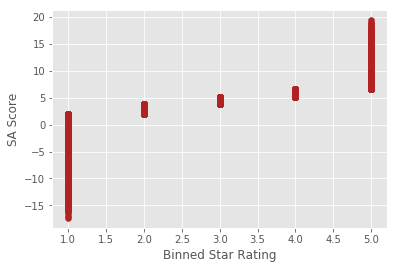

In [122]:
#Scatterplot set_stars vs. norm_score
plt.scatter(Yelp_new_rating['value_stars'], Yelp_new_rating['SAnorm_score'], color = 'firebrick')
plt.xlabel('Binned Star Rating')
plt.ylabel('SA Score')

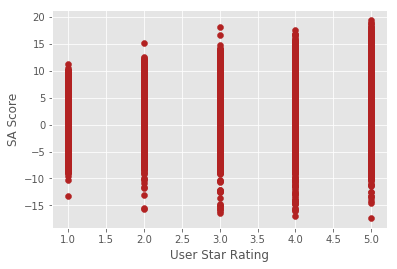

In [206]:
plt.scatter(Yelp_new_rating['stars'], Yelp_new_rating['SAnorm_score'], color= 'firebrick')
plt.xlabel('User Star Rating')
plt.ylabel('SA Score')
plt.savefig('SA_UserRating_Scatter.png', dpi = 300)

In [43]:
#Export BinnedStar data to CSV
BinnedStars=Yelp_new_rating[['SAnorm_score', 'value_stars']]
BinnedStars.head()
BinnedStars.to_csv('Resources/BinnedStars.csv', index=False)

In [44]:
#Export UserStar data to CSV
UserStars=Yelp_new_rating[['SAnorm_score', 'stars']]
UserStars.head()
UserStars.to_csv('Resources/UserStars.csv', index=False)

In [45]:
#Export multiple variables to CSV - NEED TO CALCULATE WORD COUNT TO GET THIS
MultiVariables=Yelp_new_rating[['user_id','word_count','review_count','SAnorm_score','stars','value_stars']]
MultiVariables.head()
MultiVariables.to_csv('Resources/MultiVariables.csv', index=False)

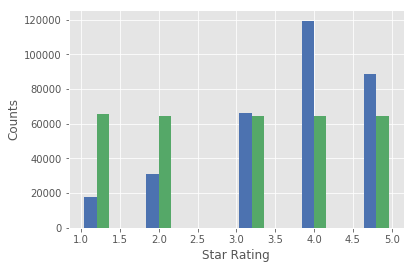

In [117]:
#Visualize distribution of star vs value_stars
x = Yelp_subsample['stars'] #blue
y = Yelp_subsample['value_stars'] #green
plt.hist([x, y])
plt.xlabel('Star Rating')
plt.ylabel('Counts')
plt.show()

In [48]:
Yelp_new_rating.head()

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count,cat_stars,value_stars,SAsum_score,SAnorm_score
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,127,5,5,22,7.778175
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,128,1,1,5,1.581139
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,190,4,4,23,6.147009
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,98,1,1,1,0.447214
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,106,3,3,18,4.992302


### Histograms showing SA frequency for all star ratings

/Users/Maciel/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


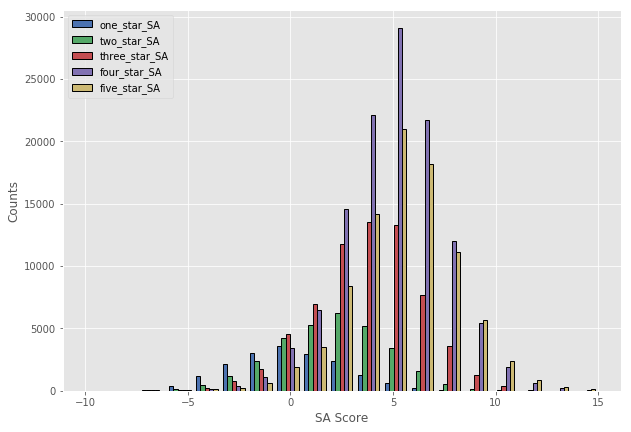

In [244]:
#Creat histograms showing SA frequency for each star rating
one_star_SA=Yelp_new_rating.query('stars==1')['SAnorm_score']
two_star_SA=Yelp_new_rating.query('stars==2')['SAnorm_score']
three_star_SA=Yelp_new_rating.query('stars==3')['SAnorm_score']
four_star_SA=Yelp_new_rating.query('stars==4')['SAnorm_score']
five_star_SA=Yelp_new_rating.query('stars==5')['SAnorm_score']

plt.style.use('seaborn-deep')
plt.figure(figsize=(10,7))
bins = np.linspace(-10, 15, 20)
plt.hist([one_star_SA,two_star_SA, three_star_SA, four_star_SA, five_star_SA], 
         bins, label=['one_star_SA','two_star_SA', 'three_star_SA', 'four_star_SA', 'five_star_SA' ],
         edgecolor='black', linewidth=1)

plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.savefig('test.jpg', dpi=300)
plt.show()

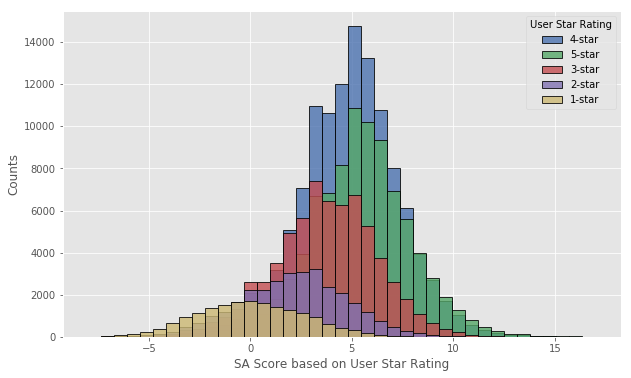

In [255]:
bins = np.linspace(-8, 17, 40)

plt.figure(figsize=(10,6))
plt.hist(four_star_SA, bins, alpha=0.8,label = '4-star', edgecolor='black', linewidth=1)
plt.hist(five_star_SA, bins, alpha=0.8,label = '5-star', edgecolor='black', linewidth=1)
plt.hist(three_star_SA, bins, alpha=0.8,label = '3-star', edgecolor='black', linewidth=1)
plt.hist(two_star_SA, bins, alpha=0.8, label='2-star', edgecolor='black', linewidth=1)
plt.hist(one_star_SA, bins, alpha=0.8, label='1-star', edgecolor='black', linewidth=1)
plt.legend(loc='upper right', title = 'User Star Rating')
plt.xlabel('SA Score based on User Star Rating')
plt.ylabel('Counts')
plt.savefig('SA_Count_hist.jpg', dpi=300)
plt.show()

### Individual histograms of SA frequency for each user star rating

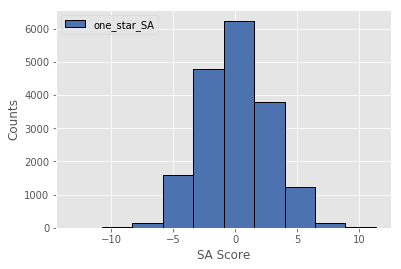

In [251]:
plt.style.use('seaborn-deep')
bins = np.linspace(-20, 20, 5)
plt.hist([one_star_SA], label=['one_star_SA'], edgecolor='black', linewidth=1)
plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.show()

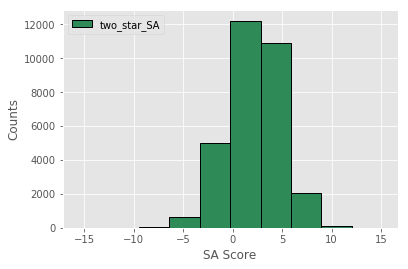

In [232]:
plt.style.use('seaborn-deep')
bins = np.linspace(-20, 20, 5)
plt.hist([two_star_SA], label=['two_star_SA'], edgecolor='black', linewidth=1, color='seagreen')
plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.show()

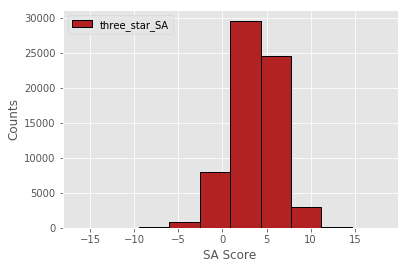

In [231]:
plt.style.use('seaborn-deep')
bins = np.linspace(-20, 20, 5)
plt.hist([three_star_SA], label=['three_star_SA'], edgecolor='black', linewidth=1, color='firebrick')
plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.show()

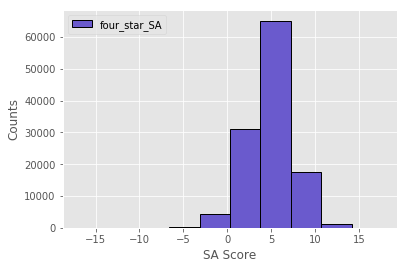

In [113]:
plt.style.use('seaborn-deep')
bins = np.linspace(-20, 20, 5)
plt.hist([four_star_SA], label=['four_star_SA'], edgecolor='black', linewidth=1, color='slateblue')
plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.show()

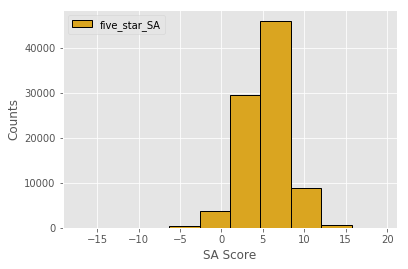

In [114]:
plt.style.use('seaborn-deep')
bins = np.linspace(-20, 20, 5)
plt.hist([five_star_SA], label=['five_star_SA'], edgecolor='black', linewidth=1, color='goldenrod')
plt.legend(loc='upper left')
plt.xlabel('SA Score')
plt.ylabel('Counts')
plt.show()

In [257]:
#Get mean and std deve of SA for each star rating
Group_by_stars= Yelp_new_rating.groupby(by='stars')
Group_by_stars.mean()

,review_count,word_count,value_stars,SAsum_score,SAnorm_score
stars,,,,,
1,71.029528,161.425372,1.350716,0.570672,0.057611
2,71.882640,161.834927,1.951383,7.122852,2.124519
3,72.546286,145.212086,2.665195,11.806646,3.701762
4,72.149958,135.134715,3.286424,15.560511,4.898793
5,71.153046,126.883876,3.543157,17.314578,5.420732


In [256]:
Group_by_stars.std()

,review_count,word_count,value_stars,SAsum_score,SAnorm_score
stars,,,,,
1,14.222300,141.683919,0.741389,9.265605,2.650861
2,14.264244,127.550973,1.139160,10.168549,2.651821
3,14.336018,111.932782,1.329250,10.974973,2.574833
4,14.233909,105.248374,1.317862,11.946679,2.478264
5,14.062487,106.829203,1.291667,13.223484,2.550201


In [258]:
Group_by_stars.count()

,name,review_id,user_id,business_id,text,date,review_count,word_count,cat_stars,value_stars,SAsum_score,SAnorm_score
stars,,,,,,,,,,,,
1,17949,17949,17949,17949,17949,17949,17949,17949,17949,17949,17949,17949
2,30956,30956,30956,30956,30956,30956,30956,30956,30956,30956,30956,30956
3,66143,66143,66143,66143,66143,66143,66143,66143,66143,66143,66143,66143
4,119400,119400,119400,119400,119400,119400,119400,119400,119400,119400,119400,119400
5,88862,88862,88862,88862,88862,88862,88862,88862,88862,88862,88862,88862
